<a href="https://colab.research.google.com/github/SangMin316/diagnosis-of-crop-disease/blob/main/csv%ED%8A%B9%EC%84%B1%ED%8C%8C%EC%95%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
import os
import json 
import torch
from torch import nn
from torchvision import models
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

In [ ]:
sd = csv_files = glob('/content/drive/MyDrive/dacon/data/train/10027/10027.csv')

list

csv특성을 파악해봅시다.

In [ ]:
csv_files = sorted(glob('/content/drive/MyDrive/dacon/data/train/*/*.csv'))

In [ ]:
temp_csv = pd.read_csv(csv_files[0])

In [ ]:
temp_csv

,측정시각,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 2 평균,내부 온도 2 최고,내부 온도 2 최저,내부 온도 3 평균,내부 온도 3 최고,내부 온도 3 최저,내부 온도 4 평균,내부 온도 4 최고,내부 온도 4 최저,내부 습도 1 평균,내부 습도 1 최고,내부 습도 1 최저,내부 습도 2 평균,내부 습도 2 최고,내부 습도 2 최저,내부 습도 3 평균,내부 습도 3 최고,내부 습도 3 최저,내부 습도 4 평균,내부 습도 4 최고,내부 습도 4 최저,내부 이슬점 평균,내부 이슬점 최고,내부 이슬점 최저,내부 CO2 평균,내부 CO2 최고,내부 CO2 최저,외부 풍속 평균,외부 풍속 최고,외부 풍속 최저,내부 EC 1 평균,내부 EC 1 최고,내부 EC 1 최저,내부 PH 1 평균,내부 PH 1 최고,내부 PH 1 최저,배지 중량 평균,배지 중량 최고,배지 중량 최저,양액 온도 평균,양액 온도 최고,양액 온도 최저,외부 풍향 수치,외부 풍향,외부 빗물 시간,외부 누적일사 평균,양액 급액 누적,양액 배액 누적
0,2021-11-26 09:30:00,9.0,9.6,8.5,-,-,-,-,-,-,-,-,-,81.5,82.0,80.8,-,-,-,-,-,-,-,-,-,6.1,6.9,5.9,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,2021-11-26 09:30:00,8.7,9.3,8.1,-,-,-,-,-,-,-,-,-,85.4,85.7,84.9,-,-,-,-,-,-,-,-,-,6.3,6.8,5.7,492.2,499.0,486.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,2021-11-26 09:20:00,7.9,8.4,7.4,-,-,-,-,-,-,-,-,-,81.9,82.7,81.6,-,-,-,-,-,-,-,-,-,5.0,5.1,4.3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2021-11-26 09:20:00,7.4,7.9,6.9,-,-,-,-,-,-,-,-,-,86.9,87.4,85.9,-,-,-,-,-,-,-,-,-,5.4,6.0,5.0,507.2,512.0,502.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2021-11-26 09:10:00,6.9,7.2,6.6,-,-,-,-,-,-,-,-,-,83.3,84.0,82.7,-,-,-,-,-,-,-,-,-,4.4,4.5,4.3,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2021-11-24 09:00:00,8.7,8.9,8.4,-,-,-,-,-,-,-,-,-,89.7,90.1,89.2,-,-,-,-,-,-,-,-,-,7.3,7.5,6.5,483.8,489.0,481.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
584,2021-11-24 08:50:00,8.8,9.0,8.7,-,-,-,-,-,-,-,-,-,85.3,85.5,85.0,-,-,-,-,-,-,-,-,-,6.6,6.8,6.6,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
585,2021-11-24 08:50:00,8.2,8.4,8.0,-,-,-,-,-,-,-,-,-,89.9,90.1,89.6,-,-,-,-,-,-,-,-,-,6.5,6.5,6.5,490.5,493.0,485.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
586,2021-11-24 08:40:00,8.5,8.6,8.4,-,-,-,-,-,-,-,-,-,85.5,85.8,85.3,-,-,-,-,-,-,-,-,-,6.4,6.8,5.8,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [ ]:
temp_csv.isnull().sum()

측정시각          0
내부 온도 1 평균    0
내부 온도 1 최고    0
내부 온도 1 최저    0
내부 온도 2 평균    0
내부 온도 2 최고    0
내부 온도 2 최저    0
내부 온도 3 평균    0
내부 온도 3 최고    0
내부 온도 3 최저    0
내부 온도 4 평균    0
내부 온도 4 최고    0
내부 온도 4 최저    0
내부 습도 1 평균    0
내부 습도 1 최고    0
내부 습도 1 최저    0
내부 습도 2 평균    0
내부 습도 2 최고    0
내부 습도 2 최저    0
내부 습도 3 평균    0
내부 습도 3 최고    0
내부 습도 3 최저    0
내부 습도 4 평균    0
내부 습도 4 최고    0
내부 습도 4 최저    0
내부 이슬점 평균     0
내부 이슬점 최고     0
내부 이슬점 최저     0
내부 CO2 평균     0
내부 CO2 최고     0
내부 CO2 최저     0
외부 풍속 평균      0
외부 풍속 최고      0
외부 풍속 최저      0
내부 EC 1 평균    0
내부 EC 1 최고    0
내부 EC 1 최저    0
내부 PH 1 평균    0
내부 PH 1 최고    0
내부 PH 1 최저    0
배지 중량 평균      0
배지 중량 최고      0
배지 중량 최저      0
양액 온도 평균      0
양액 온도 최고      0
양액 온도 최저      0
외부 풍향 수치      0
외부 풍향         0
외부 빗물 시간      0
외부 누적일사 평균    0
양액 급액 누적      0
양액 배액 누적      0
dtype: int64

In [ ]:
csv_features = ['내부 온도 1 평균', '내부 습도 1 평균', '내부 이슬점 평균']

temp_csv = pd.read_csv(csv_files[0])[csv_features]

In [ ]:
temp_csv

,내부 온도 1 평균,내부 습도 1 평균,내부 이슬점 평균
0,9.0,81.5,6.1
1,8.7,85.4,6.3
2,7.9,81.9,5.0
3,7.4,86.9,5.4
4,6.9,83.3,4.4
...,...,...,...
583,8.7,89.7,7.3
584,8.8,85.3,6.6
585,8.2,89.9,6.5
586,8.5,85.5,6.4


In [ ]:
temp_csv.iloc[:,1]

0      9.6
1      9.3
2      8.4
3      7.9
4      7.2
      ... 
583    8.9
584    9.0
585    8.4
586    8.6
587    7.9
Name: 내부 온도 1 최고, Length: 588, dtype: float64

각 column 값들이 시간에 따라 어떻게 변하는 지 그려봅시다.

In [ ]:
a = temp_csv.iloc[:,1].to_numpy()
a

array([ 9.6,  9.3,  8.4,  7.9,  7.2,  6.8,  6.6,  6. ,  5.5,  6.1,  5.8,
        5.2,  5.1,  5.8,  5.2,  5.9,  5.8,  5.2,  5.1,  5.7,  5.7,  5. ,
        5.6,  5. ,  5.7,  5. ,  5. ,  5.7,  5.7,  5.1,  5.8,  5.1,  5.1,
        5.8,  5.9,  5.2,  5.9,  5.2,  5.2,  6. ,  6.1,  5.3,  6.2,  5.4,
        5.4,  6.2,  6.3,  5.5,  6.3,  5.5,  5.6,  6.4,  6.5,  5.6,  6.5,
        5.7,  5.8,  6.5,  6.6,  5.8,  6.6,  5.8,  5.8,  6.6,  6.6,  5.9,
        6.7,  5.9,  5.9,  6.7,  6.7,  5.9,  5.9,  6.8,  6.8,  6. ,  6.9,
        6.1,  6.1,  6.9,  7. ,  6.1,  7. ,  6.2,  7.1,  6.3,  6.3,  7.2,
        7.2,  6.4,  6.4,  7.2,  7.3,  6.4,  6.5,  7.3,  7.3,  6.6,  7.4,
        6.6,  6.6,  7.4,  7.4,  6.6,  7.5,  6.7,  6.8,  7.6,  7.6,  6.8,
        7.7,  6.9,  7. ,  7.8,  7.9,  7.1,  7.9,  7.1,  7.2,  8. ,  8.1,
        7.3,  8.2,  7.3,  7.4,  8.2,  8.3,  7.6,  8.4,  7.6,  8.4,  7.6,
        8.5,  7.7,  8.5,  7.8,  7.8,  8.6,  8.6,  7.9,  7.9,  8.7,  8.1,
        8.8,  8.9,  8.1,  8.2,  9. ,  9. ,  8.3,  9

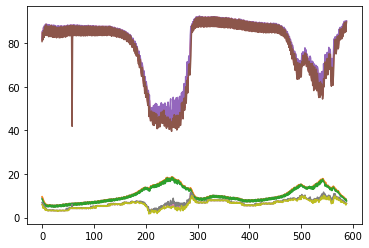

In [ ]:
xarr = np.arange(len(temp_csv))
for i in range(len(temp_csv.columns)):
  yarr = temp_csv.iloc[:,i].to_numpy()
  plt.plot(xarr,yarr)
plt.show()

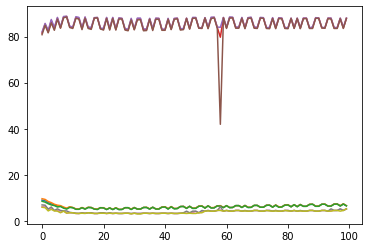

In [ ]:
xarr = np.arange(100)
for i in range(9):
  yarr = temp_csv.iloc[0:100,i]
  plt.plot(xarr, yarr)
plt.show()

In [ ]:
csv_features = ['내부 온도 1 평균', '내부 습도 1 평균', '내부 이슬점 평균']

temp_csv = pd.read_csv(csv_files[0])[csv_features]

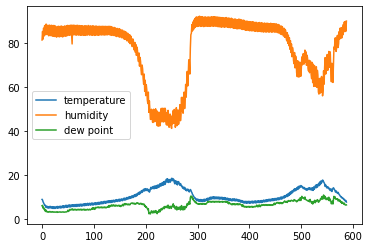

In [ ]:
xarr = np.arange(len(temp_csv))
name_list = ['temperature', 'humidity', 'dew point']
for i in range(3):
  yarr = temp_csv.iloc[:,i]
  plt.plot(xarr, yarr, label = name_list[i])

plt.legend()

No handles with labels found to put in legend.


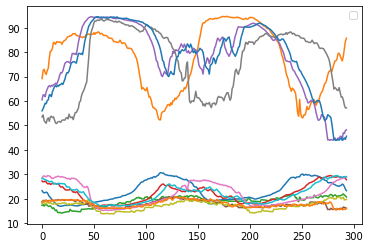

In [ ]:
for j in range(1,5):
  temp_csv = pd.read_csv(csv_files[j])[csv_features]
  xarr = np.arange(len(temp_csv))
  for i in range(3):
    yarr = temp_csv.iloc[:,i]
    plt.plot(xarr, yarr)

plt.legend()

decision tree를 만드려고 했다.

그래서 특정 온도 이상인 점이 몇개 이상이면~ 이런식으로 기준을 만들면 좋지 않을까 했다.

하지만 대회 제출 시간이 부족해서 그러지는 못했다.

In [ ]:
from scipy.optimize import curve_fit
def sin_fn(x,a,b,c,d):
  return a*np.sin(b*x) + d +c

In [ ]:
popt, pcov = curve_fit(sin_fn, xarr, yarr)

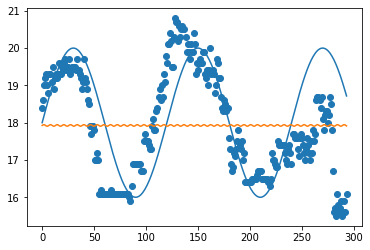

In [ ]:
plt.scatter(xarr,yarr)
plt.plot(xarr, sin_fn(xarr,2,np.pi/60,0,18))
plt.plot(xarr,sin_fn(xarr,*popt))
plt.show()

아래 그림은,, 모델을 다돌리고 결과를 따로 저장해서 그림을 그린것이다.

코드를 뒤죽 박죽 해놨다. 시간이 너무 없어서 마음의 여유가 없었나 보당 ㅜ

<BarContainer object of 7 artists>

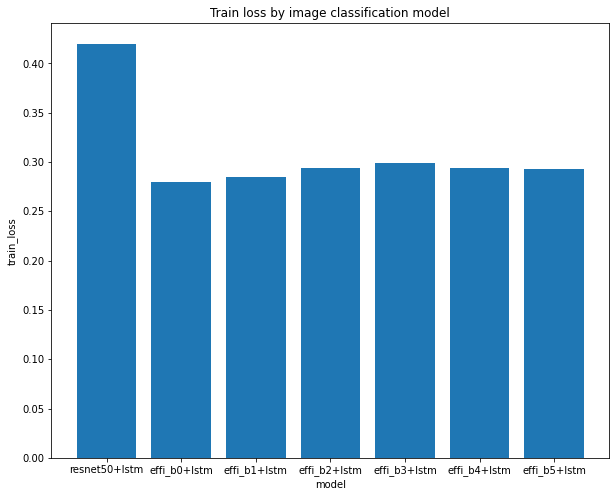

In [ ]:
plt.figure(figsize=(10,8))
x = [0,1,2,3,4,5,6]
y = [0.4199, 0.2797, 0.2852,0.2939,0.2991,0.2942,0.2930]
plt.xticks(x, labels=['resnet50+lstm', 'effi_b0+lstm', 'effi_b1+lstm', 'effi_b2+lstm', 'effi_b3+lstm', 'effi_b4+lstm', 'effi_b5+lstm'])
plt.ylabel('train_loss')
plt.xlabel('model')
plt.title('Train loss by image classification model')
plt.bar(x,y)


<BarContainer object of 3 artists>

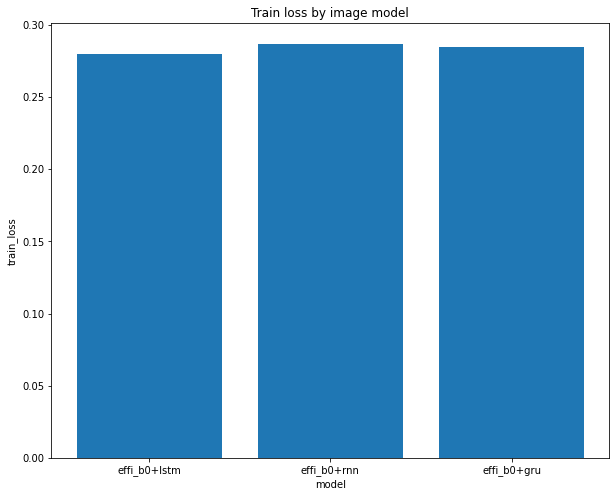

In [ ]:
plt.figure(figsize=(10,8))
x = [0,1,2]
y = [0.2797,0.2869,0.2845]
plt.xticks(x, labels=['effi_b0+lstm','effi_b0+rnn','effi_b0+gru'])
plt.ylabel('train_loss')
plt.xlabel('model')
plt.title('Train loss by image model')
plt.bar(x,y)
